# Example for computing a price serie's spectrogram

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [203]:
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_rows', 50)
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

from utils import *

# Data 

In [3]:
api_key = open(file='quandl_api').read().replace('\n', '')
quandl.ApiConfig.api_key = api_key

In [4]:
prices_dict = get_quandl_edi(list(QUANDL_FREE_SAMPLES_EDI.keys()))
print(len(prices_dict))
print(list(prices_dict.keys()))

176
['XNAS/AAXJ', 'XNAS/AAON', 'XNAS/ABAX', 'XNAS/ABM', 'XNAS/ACET', 'XNAS/ACNB', 'XNAS/AAPL', 'XNAS/AAME', 'XNAS/ACLS', 'XNAS/AAL', 'XNAS/ABCO', 'XNAS/ABG', 'XNAS/ABAC', 'XNAS/ACIW', 'XBOM/500003', 'XBOM/500008', 'XBOM/500012', 'XBOM/500013', 'XBOM/500002', 'XBOM/500023', 'XBOM/500024', 'XBOM/500027', 'XBOM/500031', 'XBOM/500032', 'XBOM/500038', 'XBOM/500039', 'XBOM/500020', 'XBOM/500040', 'XBOM/500010', 'XTSE/AND', 'XTSE/AFN', 'XTSE/AGT', 'XTSE/ACQ', 'XTSE/ALA', 'XTSE/AIF', 'XTSE/ALB', 'XTSE/ALO', 'XTSE/ABT', 'XTSE/ACD', 'XTSE/AEM', 'XTSE/AGU', 'XTSE/ALC', 'XTSE/ABX', 'XTSE/AAB', 'XSHG/600020', 'XSHG/600015', 'XSHG/600021', 'XSHG/600019', 'XSHG/600009', 'XSHG/600016', 'XSHG/600007', 'XSHG/600000', 'XSHG/600006', 'XSHG/600017', 'XSHG/600011', 'XSHG/600010', 'XSHG/600026', 'XSHG/600012', 'XSHG/600004', 'XLON/ADM', 'XLON/ABC', 'XLON/AFS', 'XLON/AAIF', 'XLON/ADT', 'XLON/AEFS', 'XLON/AAS', 'XLON/AFN', 'XLON/AGK', 'XLON/AAL', 'XLON/AEP', 'XLON/ABF', 'XLON/ADIG', 'XLON/ABBY', 'XLON/AEO', 'X

j: 19  -  XBOM/500023


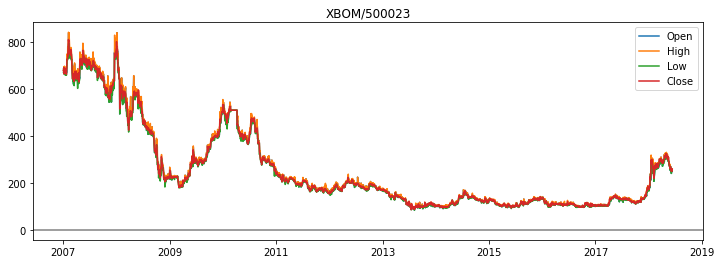

In [5]:
j = np.random.choice(len(prices_dict) - 1)
ticker_j = list(prices_dict.keys())[j]
print('j:', j, ' - ', ticker_j)
# prices_dict[ticker_j][['Open', 'High', 'Low', 'Close']].plot()
plot_prices(prices_dict[ticker_j], name=ticker_j)

# Scypy Spectrogram

In [6]:
from scipy import signal

In [7]:
price = prices_dict[ticker_j]
price

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-02,679.668292,679.668292,671.277905,679.668292,161.0
2007-01-03,689.511764,689.511764,669.637326,679.012061,226.0
...,...,...,...,...,...
2018-06-11,250.000000,250.000000,250.000000,250.000000,0.0
2018-06-12,250.050000,260.000000,250.050000,260.000000,8.0


In [8]:
price.groupby(price.index.year).count()

,Open,High,Low,Close,Volume
Date,,,,,
2007,260,260,260,260,260
2008,262,262,262,262,262
...,...,...,...,...,...
2017,260,260,260,260,260
2018,117,117,117,117,117


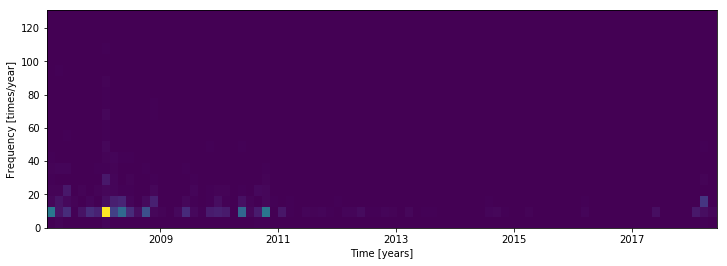

In [27]:
f, t, Sxx = signal.spectrogram(x=price.Close.values, fs=261, nperseg=40, 
                               window=('tukey', 0.25), detrend='constant')

t_date = price.index[np.floor((len(price) - 1) * t / np.max(t)).astype('int')]
plt.pcolormesh(t_date, f, Sxx)
plt.ylabel('Frequency [times/year]')
plt.xlabel('Time [years]')
plt.show()

In [10]:
print('t.shape:', t.shape)
print('f.shape:', f.shape)
print('Sxx.shape:', Sxx.shape)

t.shape: (85,)
f.shape: (21,)
Sxx.shape: (21, 85)


In [11]:
len(price) / 261

11.440613026819923

In [22]:
len(price)

2986

# Pyplot Spectrogram 

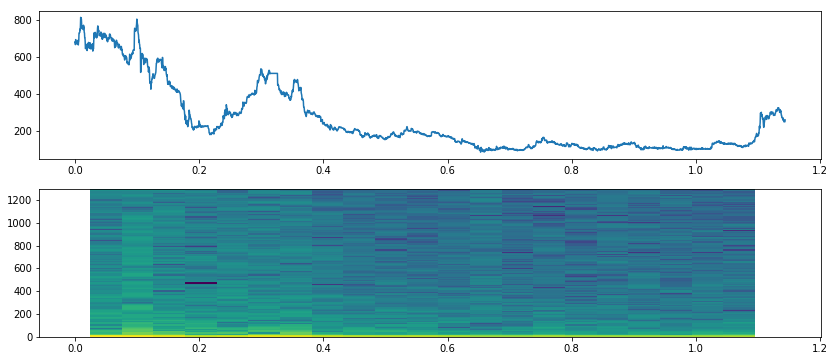

In [208]:
Fs = 10 * days_per_year          # the sampling frequency
NFFT = days_per_year         # the length of the windowing segments

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

plt.subplots(figsize=(14, 6))
ax1 = plt.subplot(211)
plt.plot(np.arange(len(price)) / Fs, price['Close'].values)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(price['Close'], NFFT=NFFT, Fs=Fs)
plt.show()

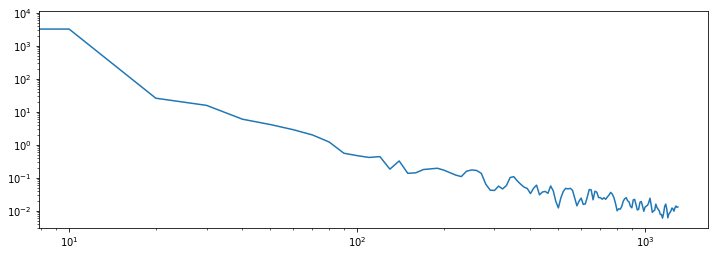

In [212]:
mean_power = Series(Pxx.mean(axis=1), freqs)
plt.loglog(mean_power)

In [210]:
mean_power.sort_values(ascending=False).head(50)

0.0      5904.773729
10.0     3233.946145
20.0       25.962148
30.0       15.753207
40.0        5.995609
50.0        4.128807
60.0        2.886306
70.0        1.997125
80.0        1.221154
90.0        0.558529
100.0       0.472224
120.0       0.441168
110.0       0.416241
140.0       0.325805
190.0       0.195653
180.0       0.187614
130.0       0.183994
170.0       0.179156
250.0       0.173847
200.0       0.171847
260.0       0.167445
240.0       0.159334
210.0       0.143537
160.0       0.142653
270.0       0.137338
150.0       0.137140
220.0       0.121566
230.0       0.109322
350.0       0.108864
340.0       0.102513
360.0       0.081034
370.0       0.064020
280.0       0.063915
420.0       0.060222
330.0       0.058383
470.0       0.056851
310.0       0.056236
380.0       0.052543
550.0       0.048311
410.0       0.048295
530.0       0.048161
390.0       0.047626
540.0       0.046423
320.0       0.046148
640.0       0.044309
650.0       0.043321
290.0       0.042461
560.0       0

# Fabricated Signal

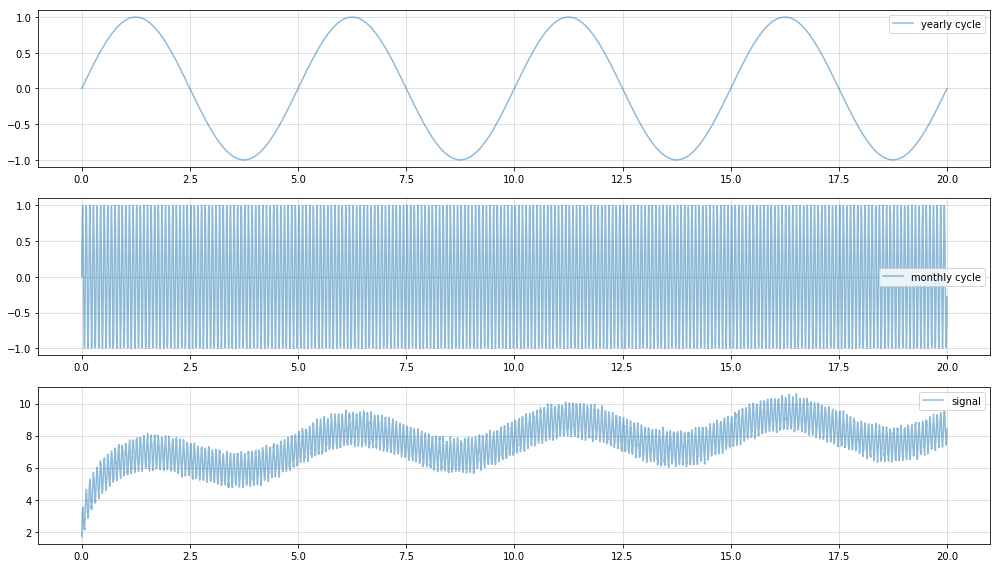

In [184]:
days_per_year = 261
sigma = 0.1

x = np.arange(20 * days_per_year)
years = x / days_per_year
yearly_cycle = np.sin(2 * np.pi * x / (2 * days_per_year))
monthly_cycle = np.sin(2 * np.pi * x * 12 / days_per_year)
noise = sigma * np.random.randn(len(x))
y = yearly_cycle + monthly_cycle + np.log(x + 5) + noise

plt.subplots(3, 1, figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(years, yearly_cycle, label='yearly cycle', alpha=0.5)
plt.grid(alpha=0.5); plt.legend()
plt.subplot(3, 1, 2)
plt.plot(years, monthly_cycle, label='monthly cycle', alpha=0.5)
plt.grid(alpha=0.5); plt.legend()
plt.subplot(3, 1, 3)
plt.plot(years, y, label='signal', alpha=0.5)
plt.grid(alpha=0.5); plt.legend()
plt.tight_layout()

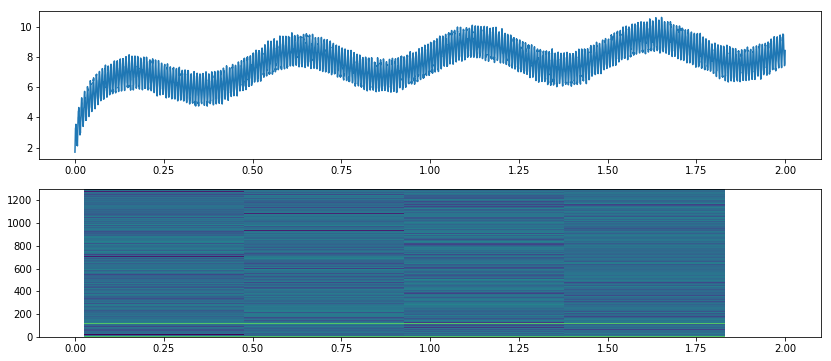

In [195]:
Fs = 10 * days_per_year          # the sampling frequency
NFFT = 5 * days_per_year         # the length of the windowing segments

plt.subplots(figsize=(14, 6))
ax1 = plt.subplot(211)
plt.plot(years / 10, y)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(y, NFFT=NFFT, Fs=Fs)
plt.show()

In [196]:
print('Monthly cycle freq.:', 12)
print('Yearly cycle freq.:', 1)

Monthly cycle freq.: 12
Yearly cycle freq.: 1


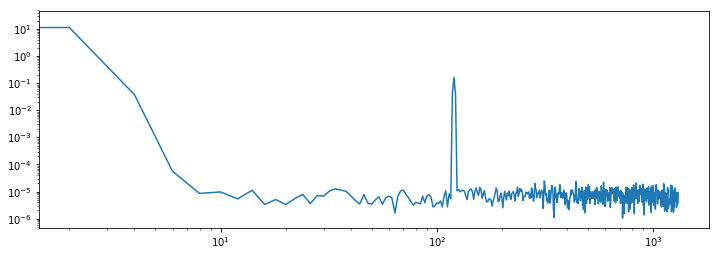

In [197]:
mean_power = Series(Pxx.mean(axis=1), freqs)
# np.log(mean_power).plot()
plt.loglog(mean_power)

In [198]:
mean_power.sort_values(ascending=False).head(10)

0.0      20.967825
2.0      11.503287
120.0     0.165959
118.0     0.041531
122.0     0.041358
4.0       0.037847
6.0       0.000056
314.0     0.000025
440.0     0.000023
590.0     0.000022
dtype: float64